In [4]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Installing and importing packages and library**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-15  111.150002  112.290001  109.250000  111.199997  111.199997   
2023-05-16  111.050003  114.790001  111.050003  113.400002  113.400002   
2023-05-17  114.889999  115.830002  114.220001  115.500000  115.500000   
2023-05-18  116.690002  118.599998  116.339996  118.150002  118.150002   
2023-05-19  118.160004  118.309998  115.699997  116.250000  116.250000   
2023-05-22  116.769997  116.769997  114.250000  115.010002  115.010002   
2023-05-23  114.269997  117.139999  113.779999  114.989998  114.989998   
2023-05-24  115.349998  117.339996  115.019997  116.750000  116.750000   
2023-05-25  116.629997  116.870003  114.309998  115.000000  115.000000   
2023-05-26  116.040001  121.500000  116.019997  120.110001  120.110001   

              Volume company_name  
Date                               
2023-05-15  53011100       AMAZON  
2023-05-16  71472900       AMAZON  
2023-05-17  65655200       AMAZON  
2023-05-18  73174100       AMAZON  
2023-05-19  54990200       AMAZON  
2023-05-22  70741100       AMAZON  
2023-05-23  67576300       AMAZON  
2023-05-24  63487900       AMAZON  
2023-05-25  66496700       AMAZON  
2023-05-26  96681000       AMAZON

# **Descriptive Statistics about the Data**

.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [6]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   151.188161  153.090200  149.560360  151.440120  150.936809   
std     12.176154   11.950078   12.438088   12.266710   12.326526   
min    126.010002  127.769997  124.169998  125.019997  124.656975   
25%    142.699997  144.592503  140.917496  142.912502  142.261520   
50%    149.839996  151.655006  148.104996  150.674995  150.093460   
75%    160.707497  162.305000  159.462502  160.640003  160.418121   
max    176.389999  176.389999  174.940002  175.429993  175.429993   

             Volume  
count  2.500000e+02  
mean   7.409591e+07  
std    2.239478e+07  
min    3.519590e+07  
25%    5.803380e+07  
50%    7.044820e+07  
75%    8.366650e+07  
max    1.647624e+08

We have only 255 records in one year because weekends are not included in the data.

# **Information About the Data**

.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [7]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-05-31 to 2023-05-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


# **Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

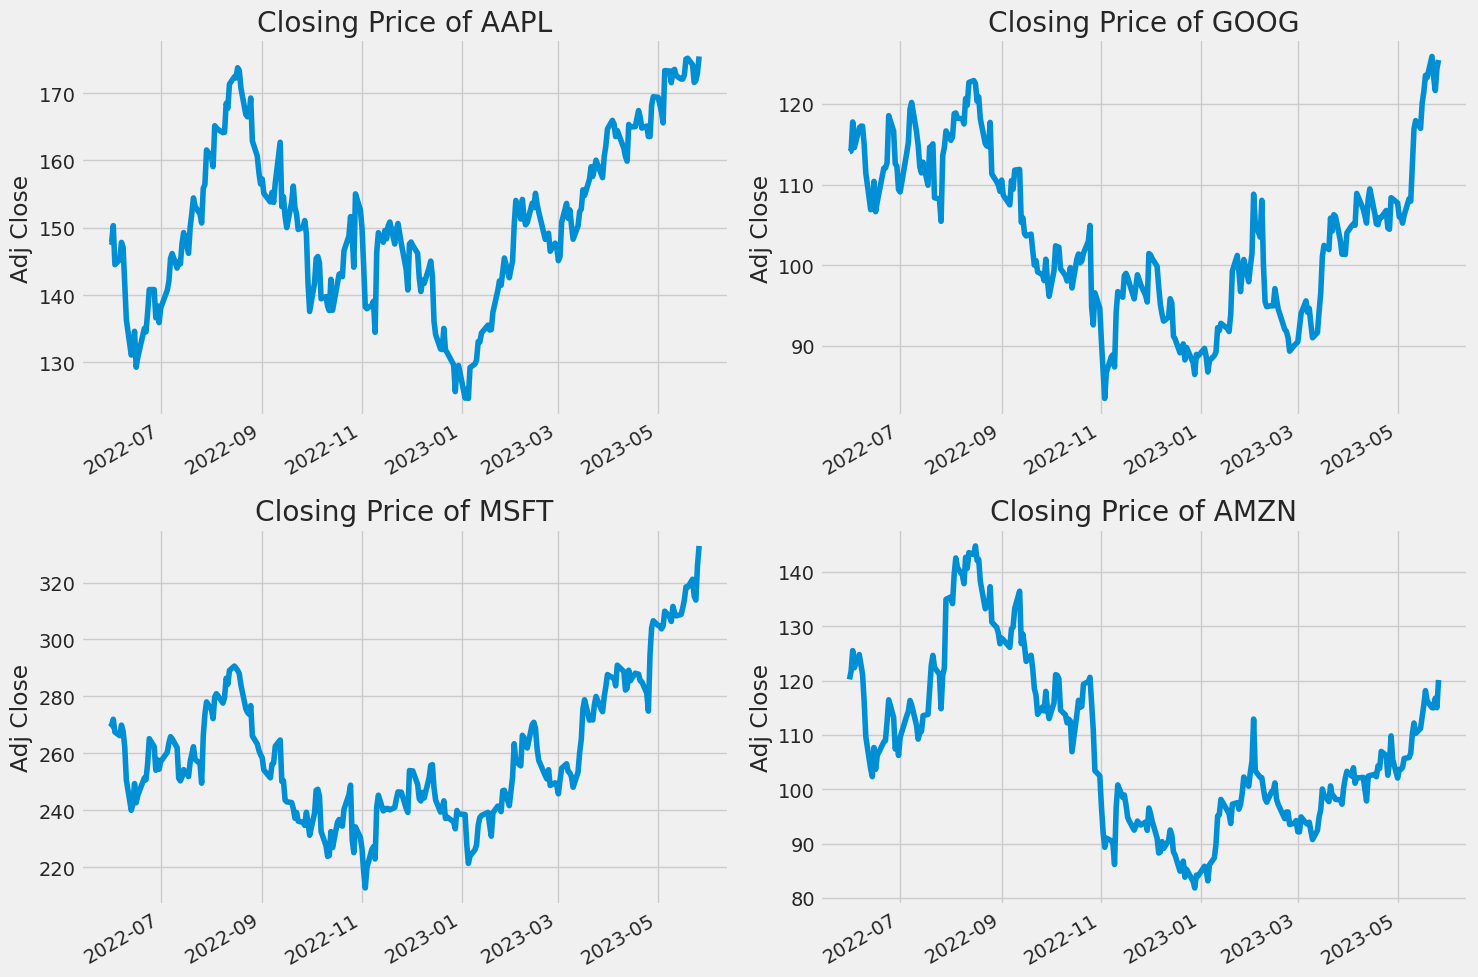

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# **Volume of Sales**

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

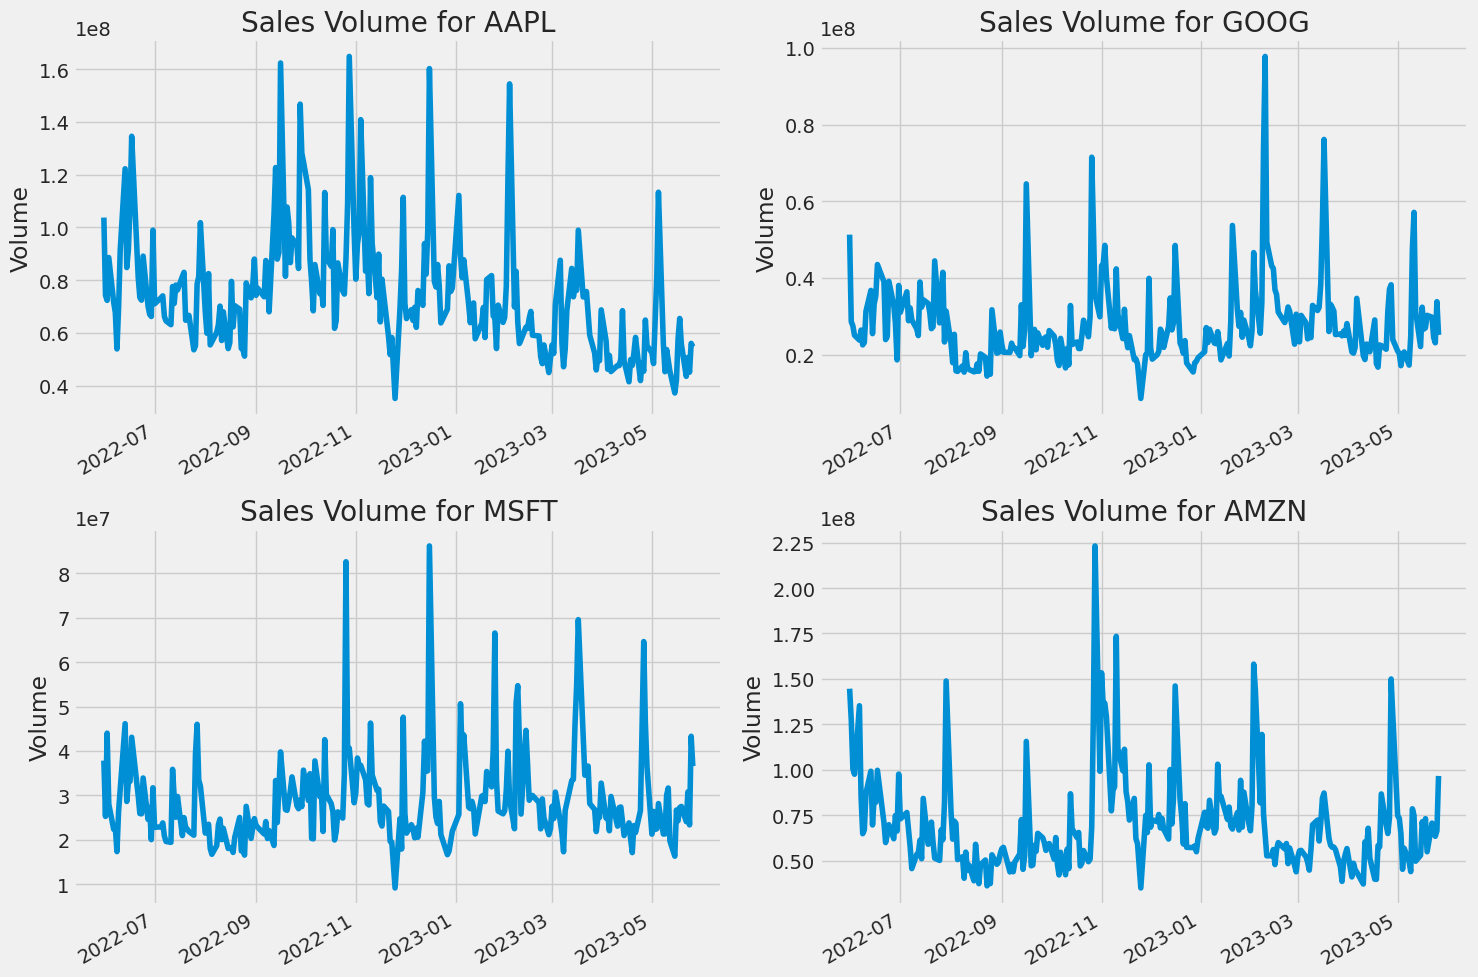

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# **2. What was the moving average of the various stocks?**

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

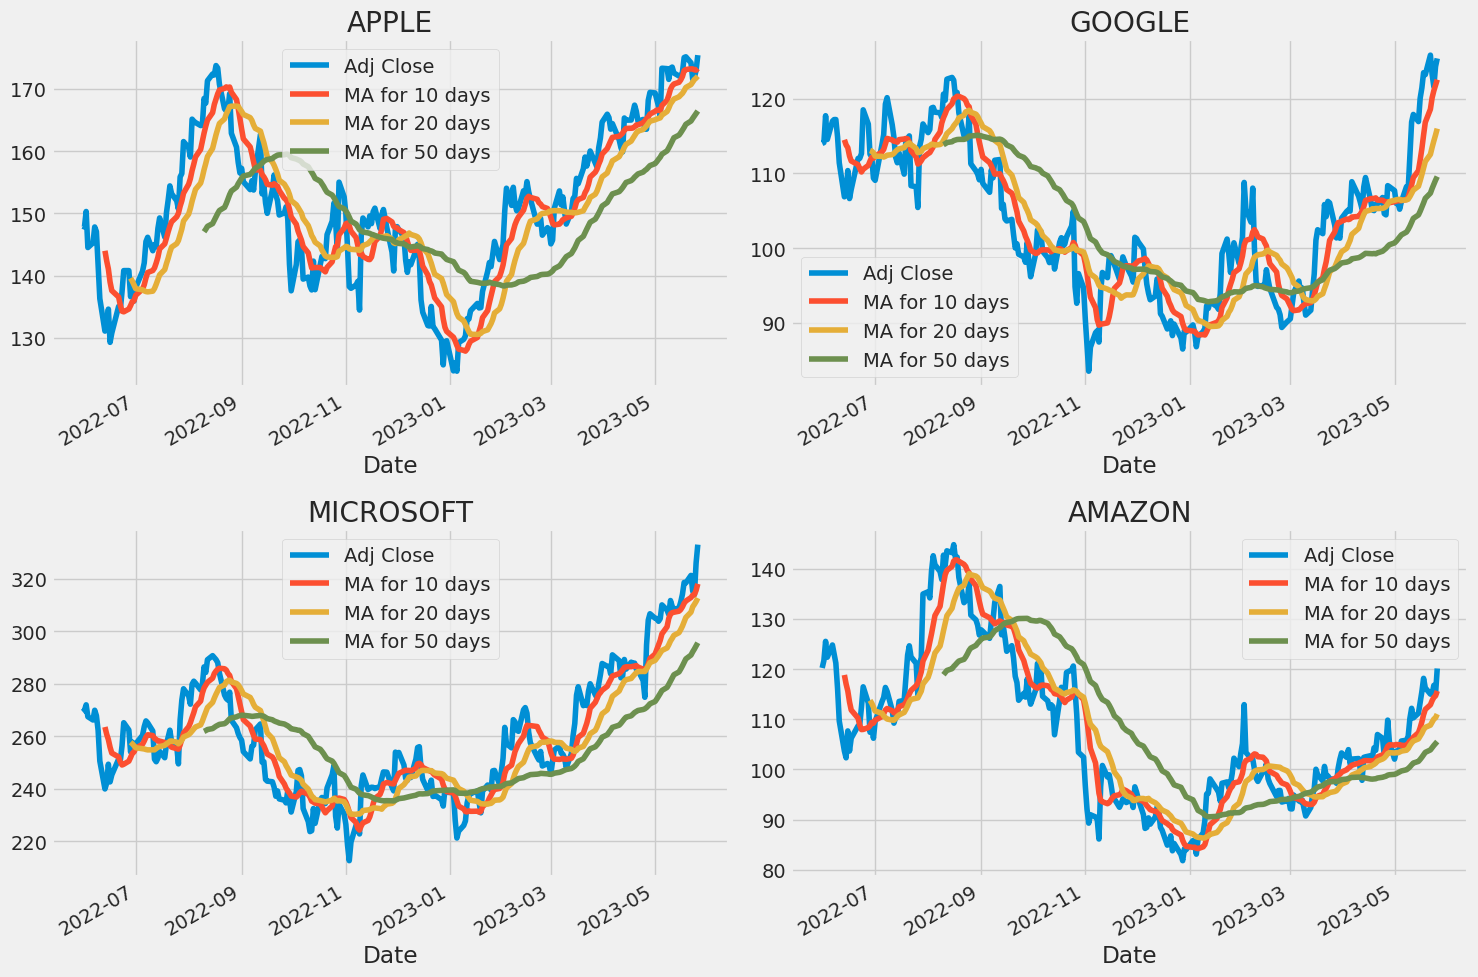

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# **3. What was the daily return of the stock on average?**

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

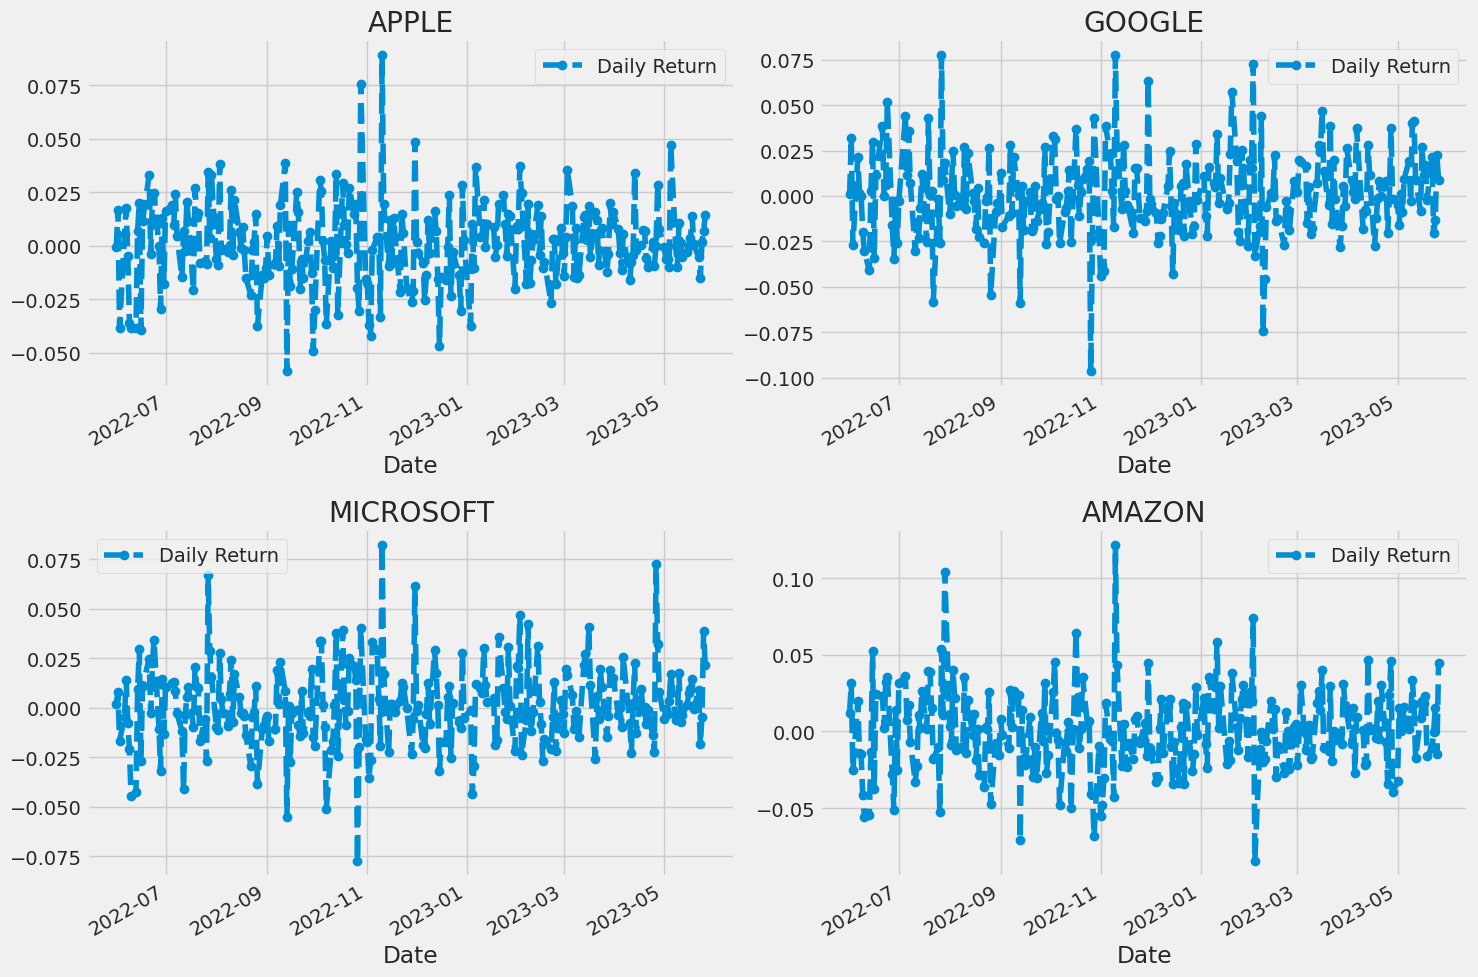

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

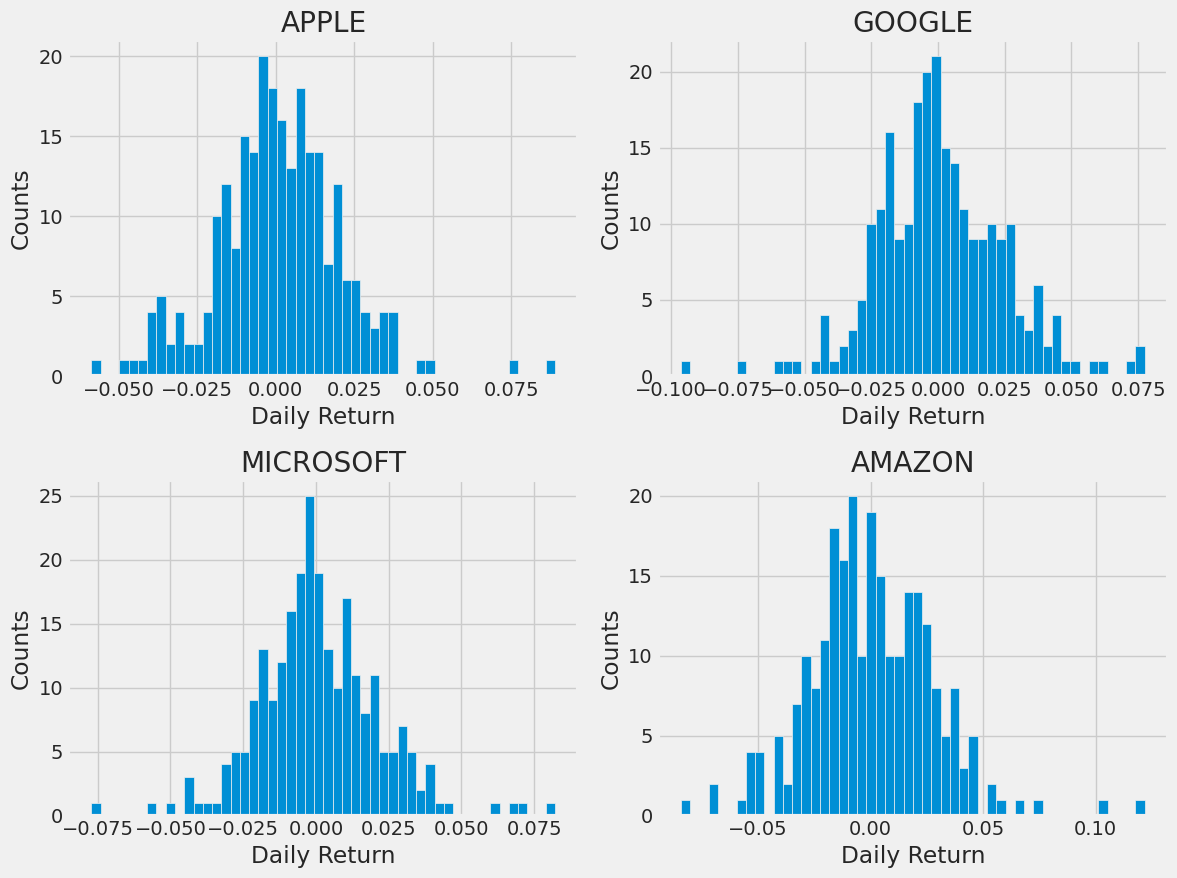

In [12]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# **4. What was the correlation between different stocks closing prices?**

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


AAPL      AMZN      GOOG      MSFT
Date                                              
2022-05-31       NaN       NaN       NaN       NaN
2022-06-01 -0.000873  0.012266  0.000859  0.002023
2022-06-02  0.016811  0.031450  0.031620  0.007929
2022-06-03 -0.038556 -0.025185 -0.027024 -0.016607
2022-06-06  0.005228  0.019943  0.021355 -0.004703

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

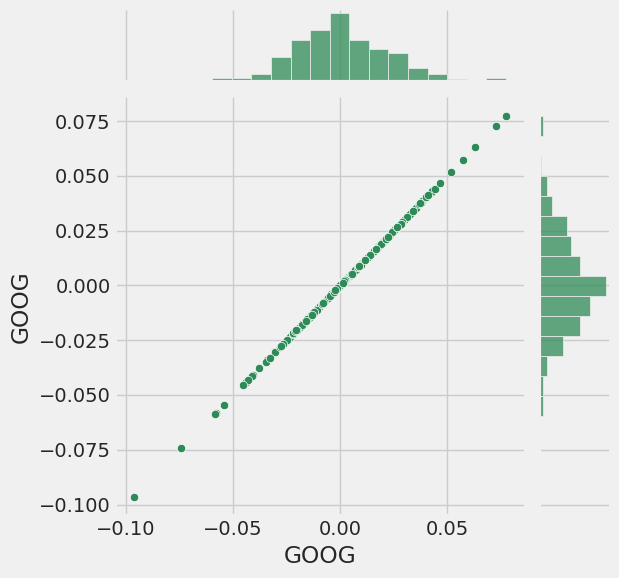

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

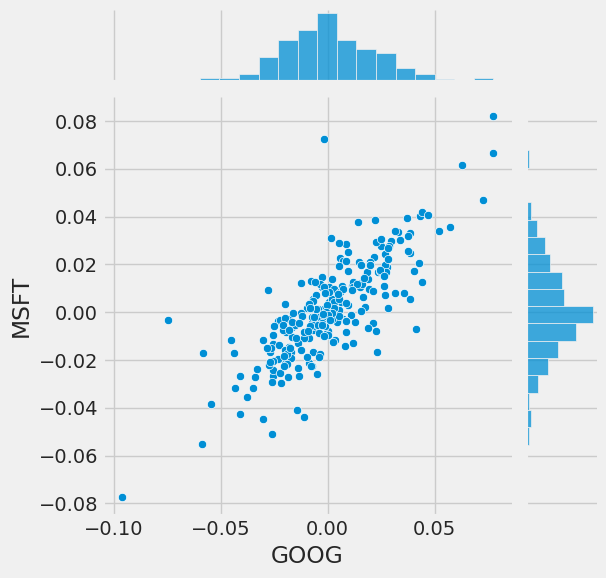

In [15]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

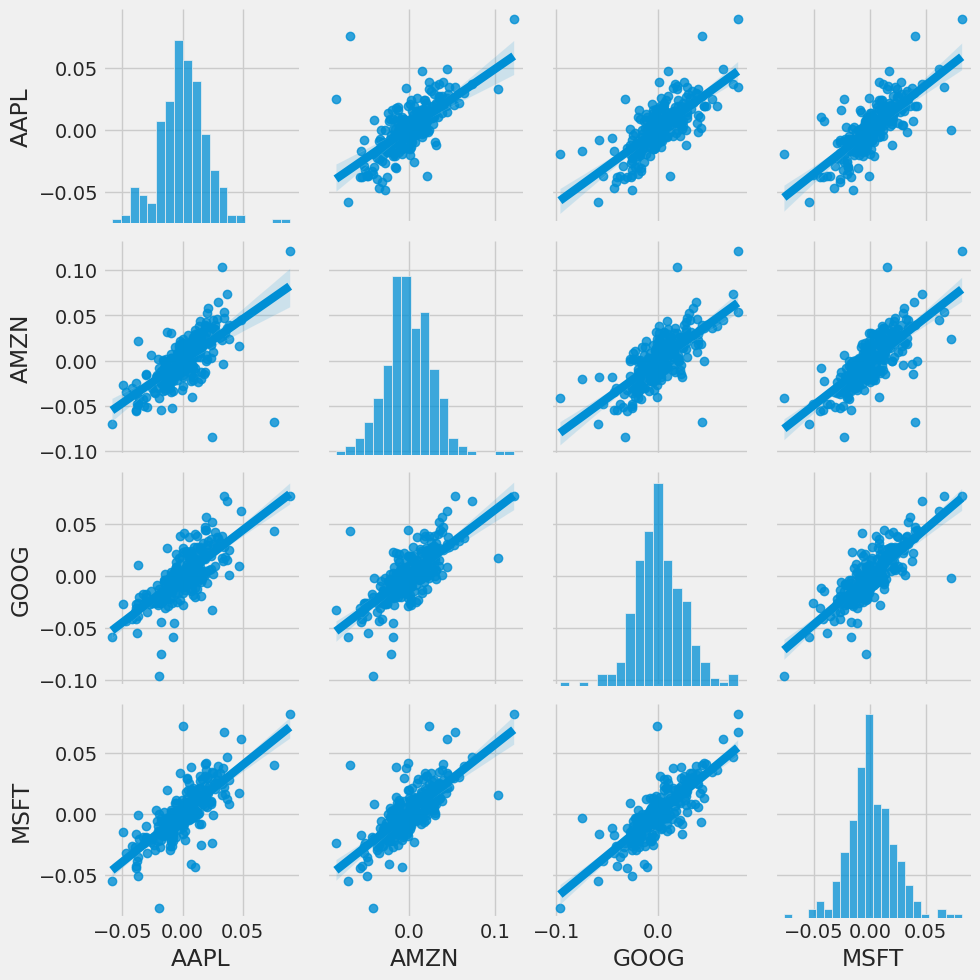

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

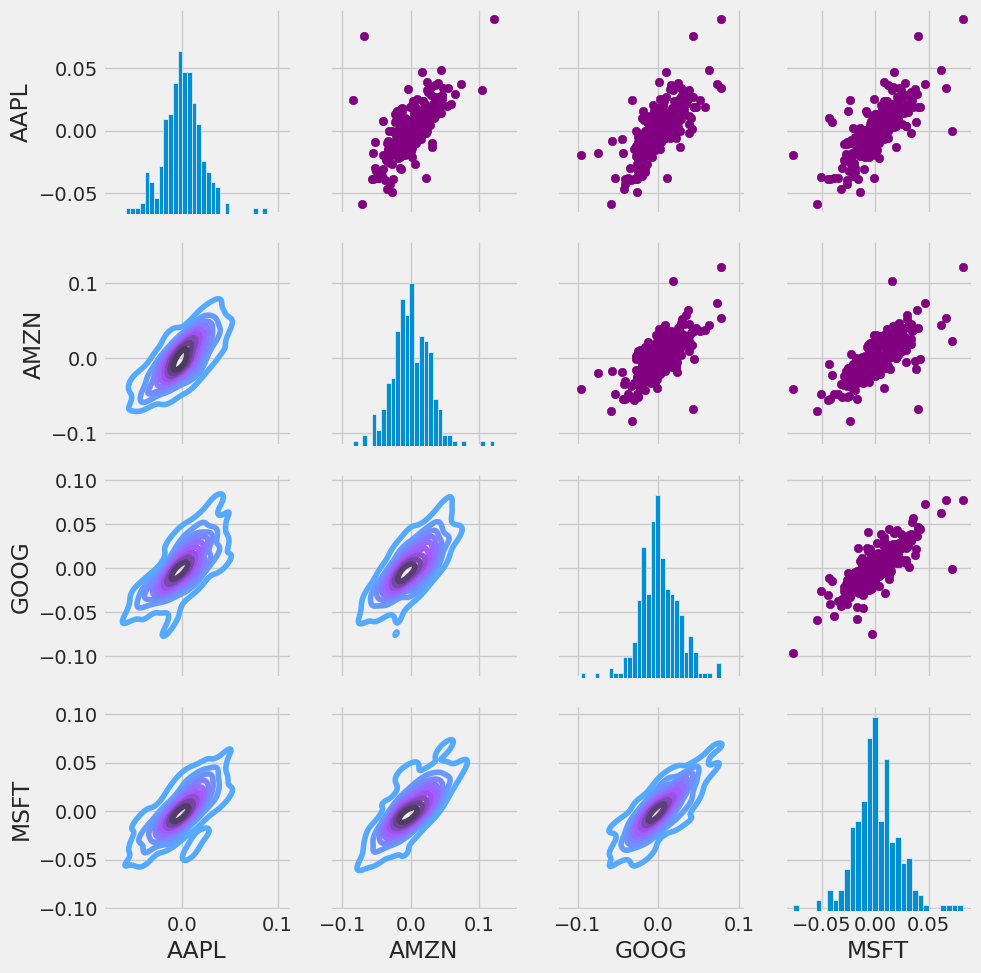

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

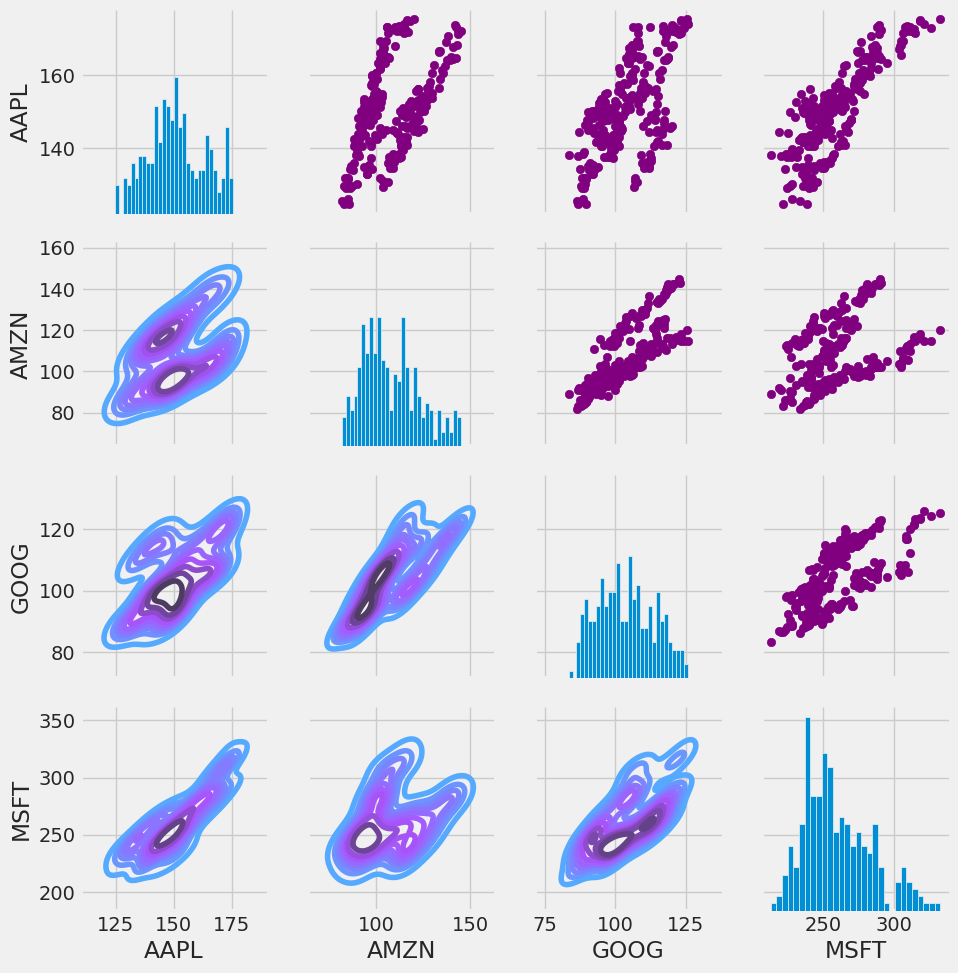

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

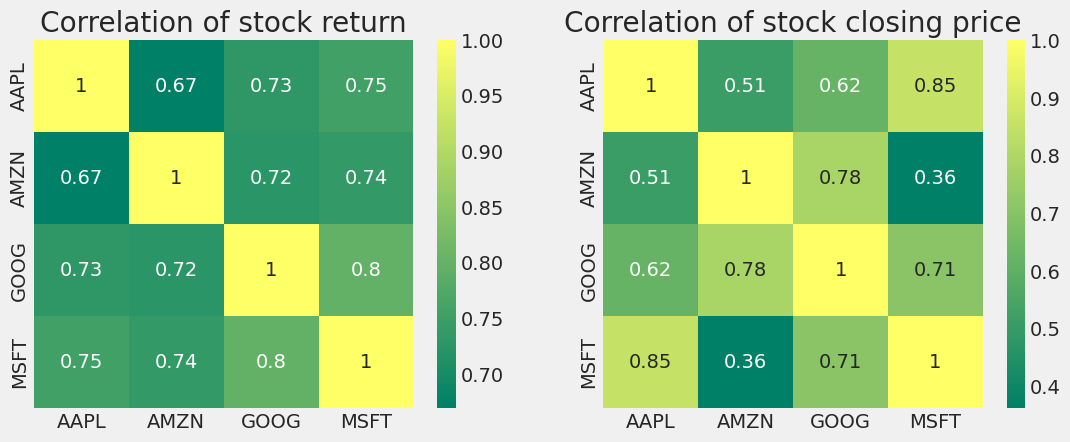

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# **5. How much value do we put at risk by investing in a particular stock?**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

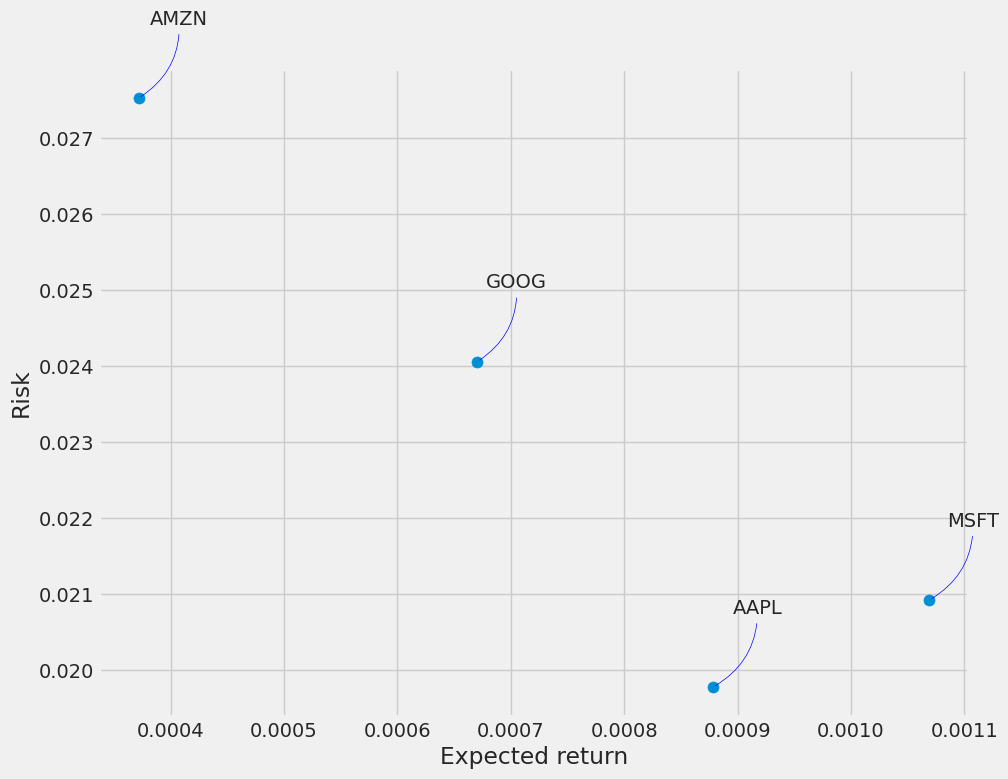

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# **6. Predicting the closing price stock price of APPLE inc:**

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.482927   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.550011   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.689342   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.821995   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.801654   
...                ...         ...         ...         ...         ...   
2023-05-22  173.979996  174.710007  173.449997  174.199997  174.199997   
2023-05-23  173.130005  173.380005  171.279999  171.559998  171.559998   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2023-05-22   43570900  
2023-05-23   50747300  
2023-05-24   45143500  
2023-05-25   56058300  
2023-05-26   54794100  

[2869 rows x 6 columns]

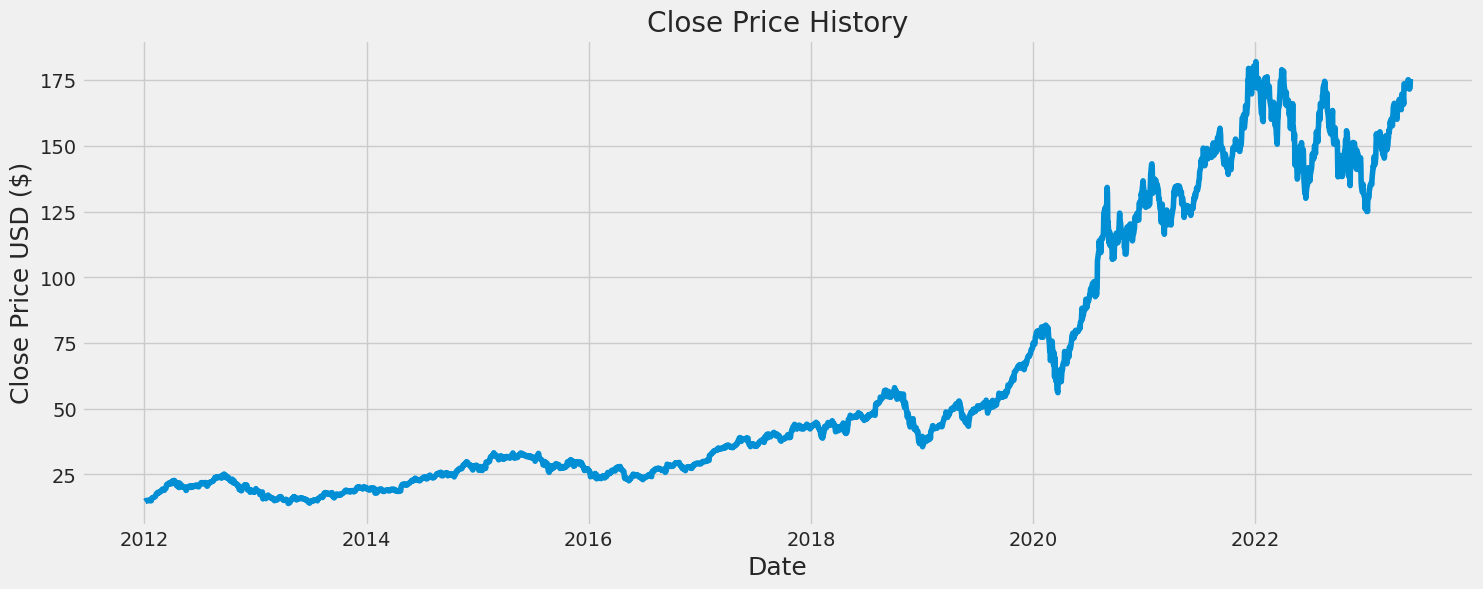

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2726

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.93948681],
       [0.94632955],
       [0.96084789]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2666/2666 [==============================] - 141s 51ms/step - loss: 0.0013


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 36ms/step


6.968328968005623

<ipython-input-28-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


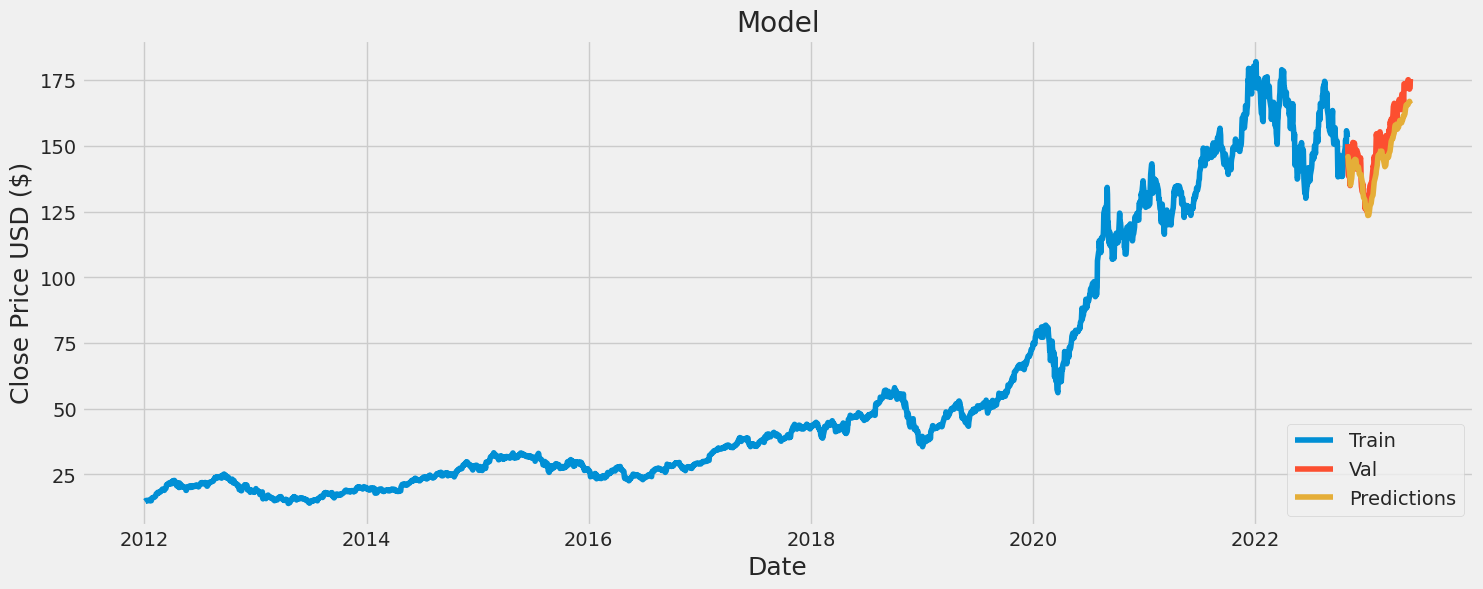

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2022-11-01  150.649994   145.481049
2022-11-02  145.029999   145.898697
2022-11-03  138.880005   144.998215
2022-11-04  138.380005   142.701080
2022-11-07  138.919998   140.206314
...                ...          ...
2023-05-22  174.199997   166.608582
2023-05-23  171.559998   166.912766
2023-05-24  171.839996   166.621368
2023-05-25  172.990005   166.222382
2023-05-26  175.429993   166.048111

[143 rows x 2 columns]

In [ ]:
# Show the valid and predicted prices
valid

# **Installing and importing packages and library**

In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline



# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

import warnings
warnings.filterwarnings('ignore')


# **Dataset Importing and Cleaning**

In [ ]:
# import all stock prices 
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


<class 'pandas.core.frame.DataFrame'>
Index: 153623 entries, 2016-01-05 to 2011-04-19
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  153623 non-null  object 
 1   open    153623 non-null  float64
 2   close   153623 non-null  float64
 3   low     153623 non-null  float64
 4   high    153623 non-null  float64
 5   volume  153622 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.2+ MB

number of different stocks:  471
['CBS', 'DOW', 'DHR', 'TJX', 'LLL', 'ALB', 'VTR', 'WEC', 'COL', 'ALXN']


In [ ]:
df.tail()

symbol       open      close        low       high     volume
date                                                                    
2011-04-19    WFM  31.795000  31.959999  31.475001  31.970000  1944200.0
2011-04-19    WHR  85.290001  86.099998  85.290001  87.180000  1195100.0
2011-04-19     WM  37.310001  37.380001  37.220001  37.470001  1669000.0
2011-04-19    WMB  24.700504  24.904303  24.635284  24.993973  4897200.0
2011-04-19    WMT  53.259998  53.349998  53.099998  53.470001        NaN

In [ ]:
df.describe()

open          close            low           high  \
count  153623.000000  153623.000000  153623.000000  153623.000000   
mean       42.815999      42.839517      42.327520      43.291884   
std        36.276651      36.287276      35.868364      36.666642   
min         3.680000       3.680000       3.650000       3.740000   
25%        22.820000      22.826212      22.520000      23.080000   
50%        34.939999      34.959999      34.560001      35.310001   
75%        51.959999      51.990002      51.380001      52.490002   
max       520.000000     525.530029     514.809998     525.570007   

             volume  
count  1.536220e+05  
mean   7.002811e+06  
std    1.642763e+07  
min    0.000000e+00  
25%    1.448500e+06  
50%    3.066000e+06  
75%    6.480175e+06  
max    6.551166e+08

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153623 entries, 2016-01-05 to 2011-04-19
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  153623 non-null  object 
 1   open    153623 non-null  float64
 2   close   153623 non-null  float64
 3   low     153623 non-null  float64
 4   high    153623 non-null  float64
 5   volume  153622 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.2+ MB


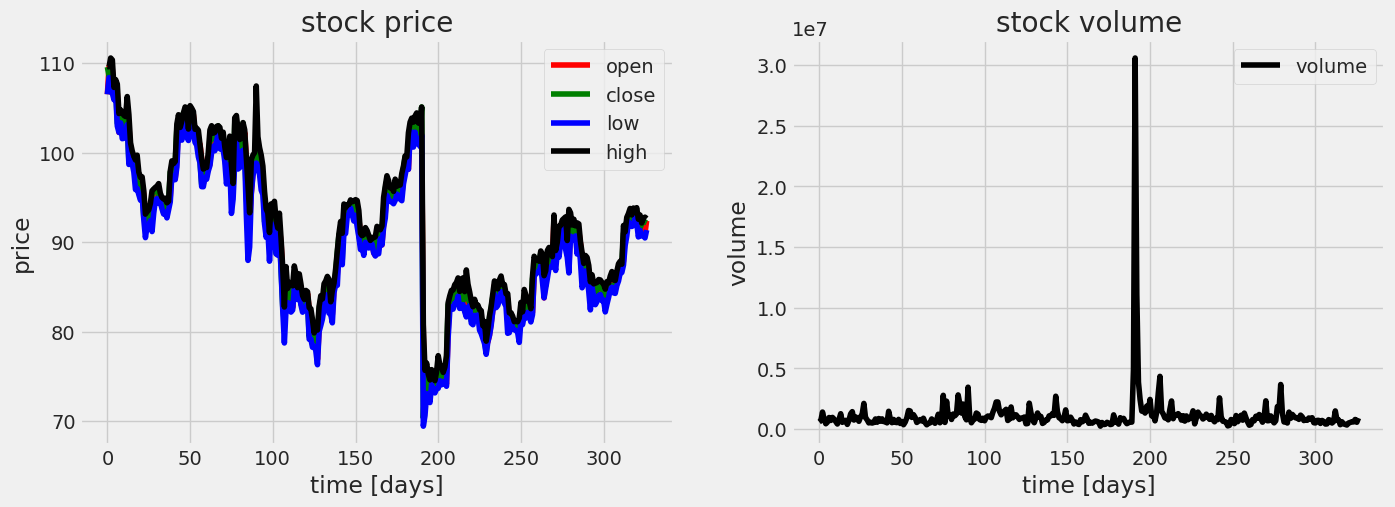

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# Stock **Clustering**

In [ ]:
df_clus =  df[["open","close"]]

In [ ]:
df_clus.head()

open       close
date                              
2016-01-05  123.430000  125.839996
2016-01-06  125.239998  119.980003
2016-01-07  116.379997  114.949997
2016-01-08  115.480003  116.620003
2016-01-11  117.010002  114.970001

In [ ]:
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153623 entries, 2016-01-05 to 2011-04-19
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    153623 non-null  float64
 1   close   153623 non-null  float64
dtypes: float64(2)
memory usage: 3.5+ MB


In [ ]:
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')


In [ ]:
## freature Scaling
cols =  df_clus.columns
ms=  MinMaxScaler()
X = ms.fit_transform(df_clus)

In [ ]:
df_clus.head()

open       close
date                              
2016-01-05  123.430000  125.839996
2016-01-06  125.239998  119.980003
2016-01-07  116.379997  114.949997
2016-01-08  115.480003  116.620003
2016-01-11  117.010002  114.970001

In [ ]:
#decomposing the dataset into 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_clus)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

principal component 1  principal component 2
0             115.693154              -1.670551
1             112.828581               3.752532
2             103.007260               1.042878
3             103.552007              -0.774307
4             103.466822               1.474281

In [ ]:
#silhoutte method to obtain optimal no. of clusters for our dataset, higher value indicates optimal cluster
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))


Silhouette score for k(clusters) = 2 is 0.8597622487357314
Silhouette score for k(clusters) = 3 is 0.6021710377978491
Silhouette score for k(clusters) = 4 is 0.5612207730119189
Silhouette score for k(clusters) = 5 is 0.5418955569136779
Silhouette score for k(clusters) = 6 is 0.5416846578716098
Silhouette score for k(clusters) = 7 is 0.5459851078803506
Silhouette score for k(clusters) = 8 is 0.5476833814083899
Silhouette score for k(clusters) = 9 is 0.5135008392965716


In [ ]:
#elbow method
K=range(2,10)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

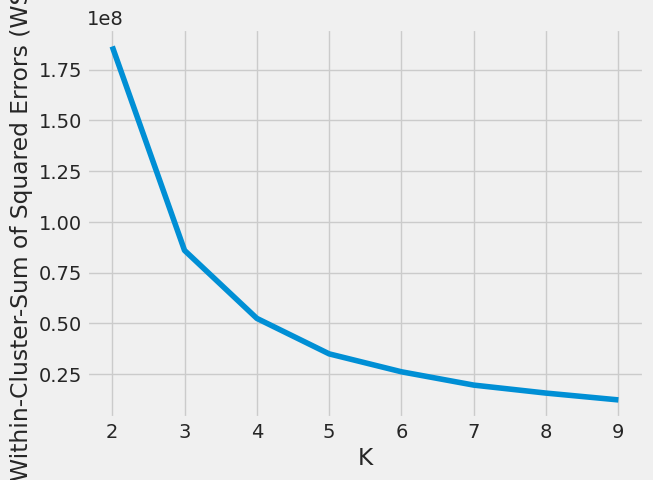

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(pca_df)

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

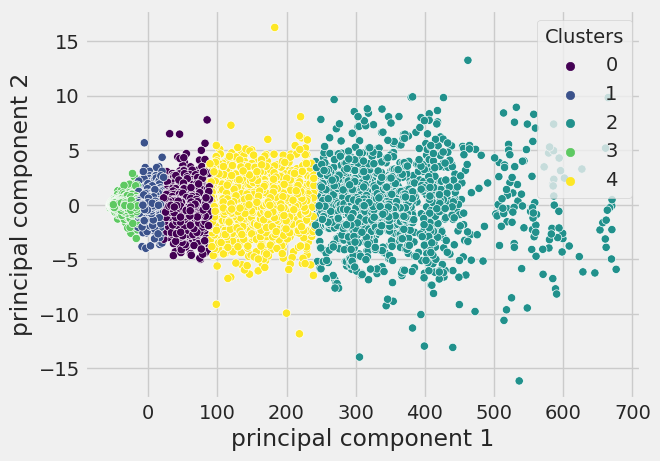

In [ ]:
#plotting the clusters
pca_df['Clusters'] = kmeans.labels_
sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

# **Data Manipulate**

choose a specific stock

drop feature: volume

normalize stock data

create train, validation and test data sets

# **1. Importing pandas and required library**

In [ ]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
# for getting data from yfinance

In [ ]:
import yfinance as yf
# importing datetime for calcualtion

In [ ]:
import datetime as dt
# imporing plotting library 

In [ ]:
import matplotlib.pyplot  as plt
import matplotlib.dates as mdates
import seaborn as sns



In [ ]:
# for plotting 
import plotly.graph_objects as graph
import plotly.express as px
# cycle is for looping into
# every variable included in the array
from itertools import cycle

In [ ]:
# for plotting 
import plotly.graph_objects as graph
import plotly.express as px
# cycle is for looping into
# every variable included in the array
from itertools import cycle

# **2. Getting Tesla stock data from yahoo finance**

In [ ]:
tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.tail()

Date        Open        High         Low  \
3246 2023-05-22 00:00:00-04:00  180.699997  189.320007  180.110001   
3247 2023-05-23 00:00:00-04:00  186.199997  192.960007  185.259995   
3248 2023-05-24 00:00:00-04:00  182.229996  184.220001  178.220001   
3249 2023-05-25 00:00:00-04:00  186.539993  186.779999  180.580002   
3250 2023-05-26 00:00:00-04:00  184.619995  198.600006  184.529999   

           Close     Volume  Dividends  Stock Splits  
3246  188.869995  132001400        0.0           0.0  
3247  185.770004  156952100        0.0           0.0  
3248  182.899994  137605100        0.0           0.0  
3249  184.470001   96870700        0.0           0.0  
3250  193.169998  161765900        0.0           0.0

In [ ]:
tesla_data.shape

(3251, 8)

# **3. renaming and removing columns**

In [ ]:
tesla_data.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close","Volume":"volume"},inplace=True)

In [ ]:
tesla_data.drop(["Dividends","Stock Splits"],axis=1,inplace = True)

In [ ]:
tesla_data.head()

date      open      high       low     close     volume
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500

# **4. Data cleaning**

In [ ]:
# checking null values if any
tesla_data.isnull().sum()/100

date      0.0
open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
dtype: float64

In [ ]:
# datatype checking
print(type(tesla_data['date'][0]))
print(type(tesla_data["open"][0]))
print(type(tesla_data["high"][0]))
print(type(tesla_data["low"][0]))
print(type(tesla_data["close"][0]))
print(type(tesla_data["volume"][0]))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>


In [ ]:
#coverting timestamps to date data type
tesla_data["date"] = pd.to_datetime(tesla_data.date,errors='coerce')

In [ ]:
tesla_data.head()

date      open      high       low     close     volume
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500

In [ ]:
tesla_data.shape

(3251, 6)

In [ ]:
# showing latest date at first
tesla_data.sort_values(by=["date"],ascending=False,inplace= True)
tesla_data.head()

date        open        high         low  \
3250 2023-05-26 00:00:00-04:00  184.619995  198.600006  184.529999   
3249 2023-05-25 00:00:00-04:00  186.539993  186.779999  180.580002   
3248 2023-05-24 00:00:00-04:00  182.229996  184.220001  178.220001   
3247 2023-05-23 00:00:00-04:00  186.199997  192.960007  185.259995   
3246 2023-05-22 00:00:00-04:00  180.699997  189.320007  180.110001   

           close     volume  
3250  193.169998  161765900  
3249  184.470001   96870700  
3248  182.899994  137605100  
3247  185.770004  156952100  
3246  188.869995  132001400

# **5. EDA Using seaborn and matplotlib**

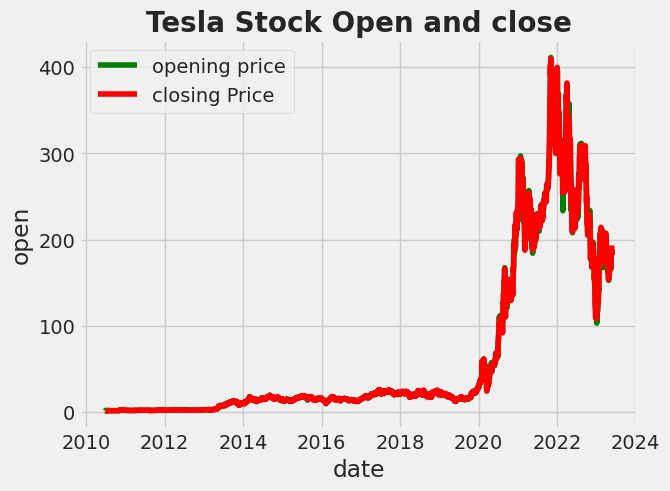

In [ ]:
# opening and closing price line chart
lineplot_open =  sns.lineplot(data= tesla_data, x = "date", y ="open" ,color ="green" ,label = "opening price")
lineplot_close = sns.lineplot(data= tesla_data,  x = "date", y = "close",color = "red",label = "closing Price")
plt.title("Tesla Stock Open and close",size =20, weight = "bold")
plt.legend
plt.show()

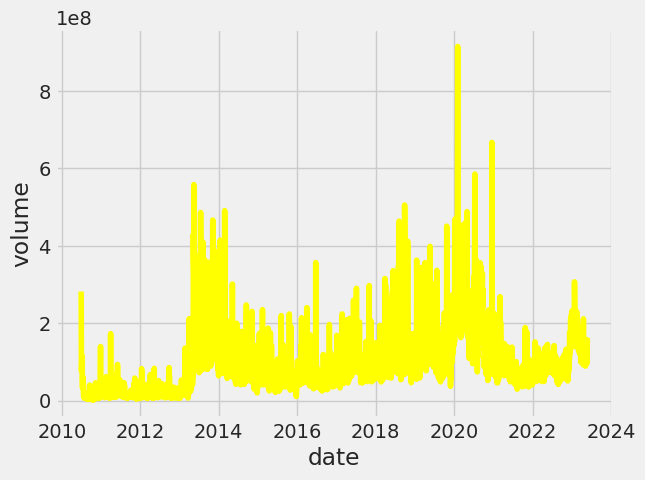

In [ ]:
lineplot_volume = sns.lineplot(data= tesla_data,x= "date",y= "volume",color = "Yellow")

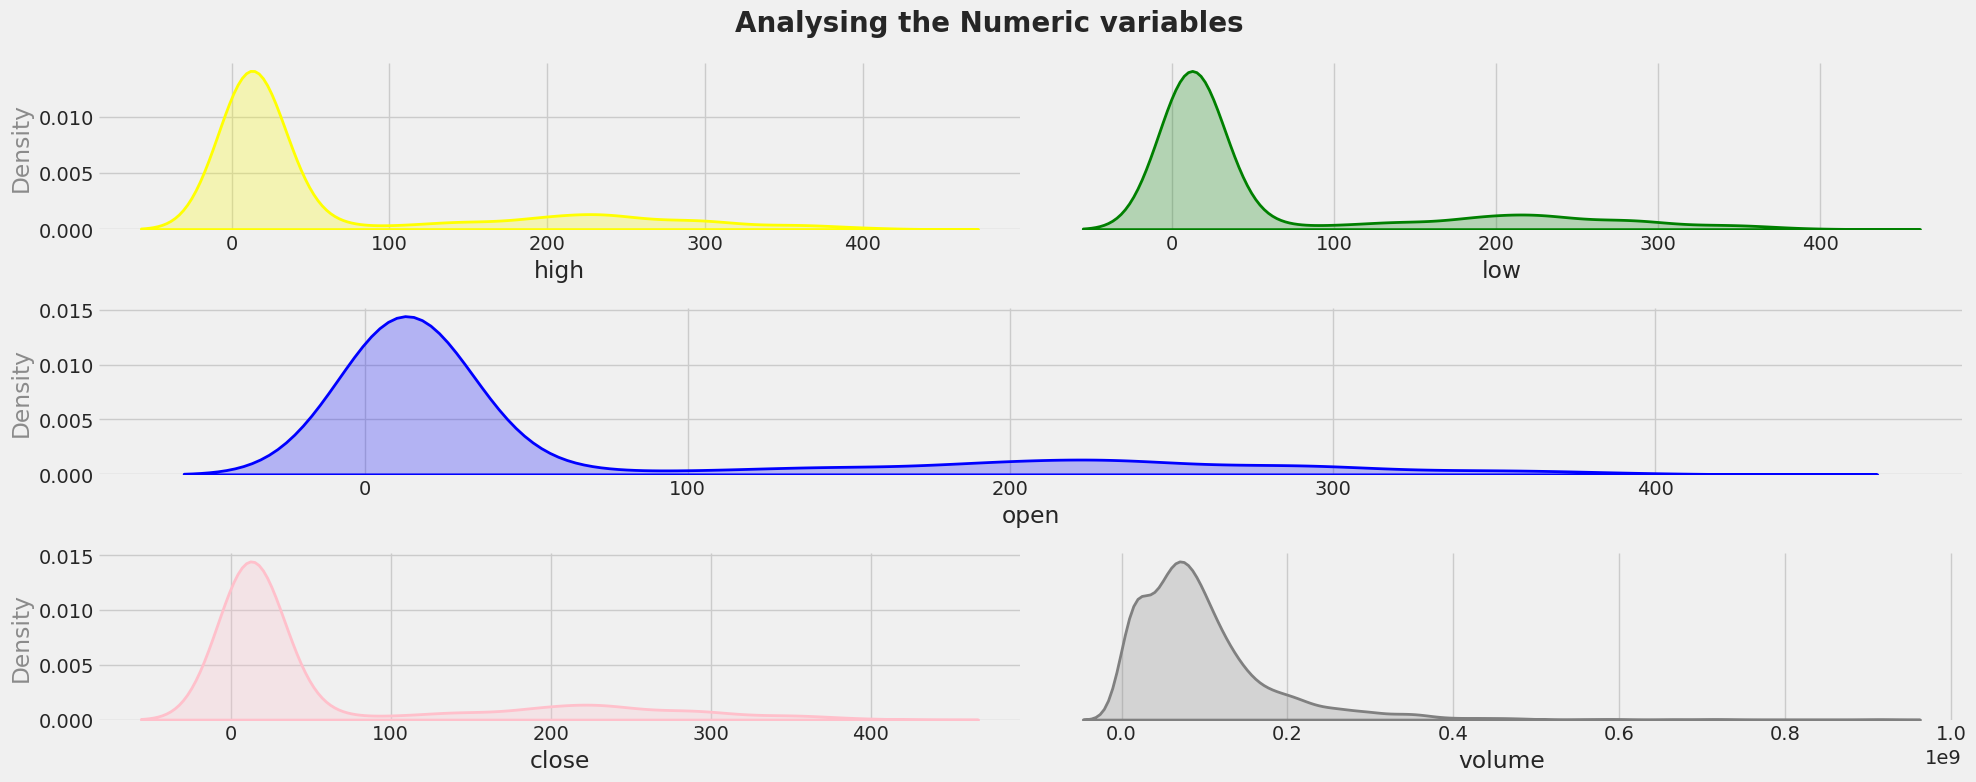

In [ ]:
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(tesla_data["high"],ax=ax["A"],color="yellow",fill=True,linewidth=2)
sns.kdeplot(tesla_data["low"],ax=ax["B"],color="green",fill=True,linewidth=2)
sns.kdeplot(tesla_data["open"],ax=ax["C"],color="blue",fill=True,linewidth=2)
sns.kdeplot(tesla_data["close"],ax=ax["D"],color="pink",fill=True,linewidth=2)
sns.kdeplot(tesla_data["volume"],ax=ax["E"],color="gray",fill=True,linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)
plt.show()

# **6. Exploratory Data Analysis Modified With Ploty**

In [ ]:
# get duration of stock data collection
print("Starting date : ",tesla_data.iloc[-1][0])
print("Ending date : ",tesla_data.iloc[0][0])
print("duration : ",tesla_data.iloc[0][0]-tesla_data.iloc[-1][0])


Starting date :  2010-06-29 00:00:00-04:00
Ending date :  2023-05-26 00:00:00-04:00
duration :  4714 days 00:00:00


In [ ]:
monthwise = tesla_data.groupby(tesla_data["date"].dt.strftime("%B"))[['open',"close"]].mean().sort_values(by="close")
monthwise

open      close
date                           
June       52.054302  52.081150
July       52.125326  52.261582
October    58.656082  58.740434
May        59.678642  59.563280
August     59.626535  59.603068
September  62.826799  62.921993
November   65.669354  65.607500
December   65.997574  65.831272
January    66.639559  66.640007
April      68.398235  68.012559
March      68.174935  68.165317
February   69.912243  69.984840

In [ ]:
fig =  graph.Figure()

fig.add_trace(graph.Bar(
x = monthwise.index,
y=monthwise["open"],
name = "Stock Open Price",
    marker_color= "Green"
))
fig.add_trace(graph.Bar(
x = monthwise.index,
y=monthwise["close"],
name = "Stock close Price",
marker_color= "red"
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()


In [ ]:
#monthwise high and low stock price
monthwise_low = tesla_data.groupby(tesla_data["date"].dt.strftime("%B"))["low"].min()
monthwise_low

date
April        1.613333
August       1.159333
December     1.666667
February     1.407333
January      1.491333
July         0.998667
June         1.169333
March        1.451333
May          1.701333
November     1.403333
October      1.333333
September    1.300000
Name: low, dtype: float64

In [ ]:
monthwise_high = tesla_data.groupby(tesla_data["date"].dt.strftime("%B"))["high"].max()
monthwise_high

date
April        384.290009
August       314.666656
December     390.946655
February     315.923340
January      402.666656
July         298.320007
June         264.209991
March        371.589996
May          318.500000
November     414.496674
October      371.736664
September    313.799988
Name: high, dtype: float64

In [ ]:
fig = graph.Figure()

fig.add_trace(graph.Bar(
x= monthwise_high.index,
    y= monthwise_high,
    name = "Stock high Price",
    marker_color= "green"
))
fig.add_trace(graph.Bar(
x= monthwise_low.index,
    y= monthwise_low,
    name = "Stock low Price",
    marker_color= "red"
))


fig.update_layout(barmode='group',plot_bgcolor = "white",
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
fig = graph.Figure()
names = cycle(["Stock Open Price","Stock Close price","Stock High Price","stock low Price"])
fig = px.line(tesla_data,x =tesla_data.date, y=[tesla_data.open,tesla_data.close,tesla_data.high,tesla_data.low],
              labels = {"date" : "Date","value" : "Stock Value"})
fig.update_layout(title_text = "Tesla Stock analysis chart",font_size=15)
fig.for_each_trace(lambda t: t.update(name =next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid = False)
fig.show()

In [ ]:
#close Price chart
closedprice =  tesla_data[["date","close"]]
closedprice

date       close
3250 2023-05-26 00:00:00-04:00  193.169998
3249 2023-05-25 00:00:00-04:00  184.470001
3248 2023-05-24 00:00:00-04:00  182.899994
3247 2023-05-23 00:00:00-04:00  185.770004
3246 2023-05-22 00:00:00-04:00  188.869995
...                        ...         ...
4    2010-07-06 00:00:00-04:00    1.074000
3    2010-07-02 00:00:00-04:00    1.280000
2    2010-07-01 00:00:00-04:00    1.464000
1    2010-06-30 00:00:00-04:00    1.588667
0    2010-06-29 00:00:00-04:00    1.592667

[3251 rows x 2 columns]

In [ ]:
fig = px.line(closedprice, x=closedprice.date, y=closedprice.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Tesla Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **6. Make Seprate Dataframe with close prices**

In [ ]:
closedf = tesla_data[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3251, 2)


In [ ]:
# ploting stock Close Price Chart
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **7. Normalizing/ scaling close value between 0 to 1**

# **8. Split data for training and testing**

# **9. Create new dataset according to time-series prediction**

# **10. Using Algorithms**

# **Now we will take data of just 1 year**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [ ]:
# Lets First Take all the Close Price 
closedf = tesla_data[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3251, 2)


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Tesla close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
closedf = closedf[closedf['date'] > '2021-08-17']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  447


In [ ]:
close_stock

date       close
3250 2023-05-26 00:00:00-04:00  193.169998
3249 2023-05-25 00:00:00-04:00  184.470001
3248 2023-05-24 00:00:00-04:00  182.899994
3247 2023-05-23 00:00:00-04:00  185.770004
3246 2023-05-22 00:00:00-04:00  188.869995
...                        ...         ...
2808 2021-08-24 00:00:00-04:00  236.163330
2807 2021-08-23 00:00:00-04:00  235.433334
2806 2021-08-20 00:00:00-04:00  226.753326
2805 2021-08-19 00:00:00-04:00  224.490005
2804 2021-08-18 00:00:00-04:00  229.663330

[447 rows x 2 columns]

In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Tesla close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
# deleting date column and normalizing using MinMax Scaler
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(447, 1)


In [ ]:
# we keep the training set as 60% and 40% testing set
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (268, 1)
test_data:  (179, 1)


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (252, 15)
y_train:  (252,)
X_test:  (163, 15)
y_test (163,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (252, 15, 1)
X_test:  (163, 15, 1)


Type Markdown and LaTeX:  **𝛼2**

 **algorithm 1 Long short-term memory(LSTM)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 54ms/step - loss: 0.2115 - val_loss: 0.6103
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1748 - val_loss: 0.5293
Epoch 3/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1433 - val_loss: 0.4588
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1177 - val_loss: 0.3954
Epoch 5/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0949 - val_loss: 0.3392
Epoch 6/200
8/8 [==============================] - 0s 14ms/step - loss: 0.0765 - val_loss: 0.2868
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0598 - val_loss: 0.2395
Epoch 8/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0464 - val_loss: 0.1942
Epoch 9/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0348 - val_loss: 0.1519
Epoch 10/200
8/8 [==============================] - 0s 15ms/step - loss: 0.0251 - val_loss: 0.1131
Epoch 11/200
8/8 [=

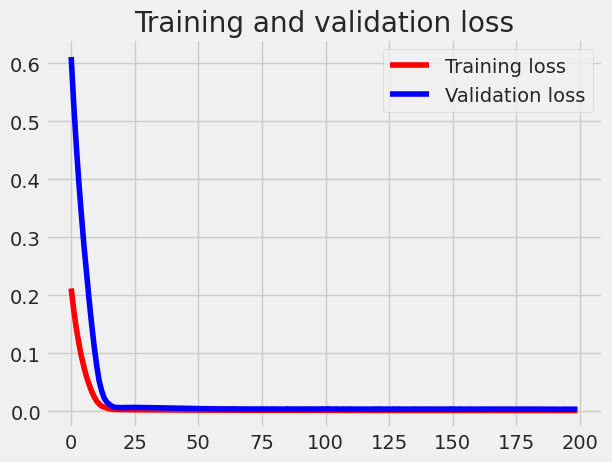

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import math

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 5ms/step


((252, 1), (163, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  10.503223573801547
Train data MSE:  110.31770544126053
Train data MAE:  8.4058291420104
-------------------------------------------------------------------------------------
Test data RMSE:  17.20893359785386
Test data MSE:  296.1473955753434
Test data MAE:  13.519451211566574


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9583928100023551
Test data explained variance regression score: 0.8848992042868353


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.957855411007975
Test data R2 score: 0.8685038863193426


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0024814903458896622
Test data MGD:  0.0028634282365193795
----------------------------------------------------------------------
Train data MPD:  0.5089676290775619
Test data MPD:  0.9129767667816165


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (447, 1)
Test predicted data:  (447, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))



Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **algorithm 2. Super Vector Regession - SVR**

In [ ]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (290, 1)
test_data:  (157, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (274, 15)
y_train:  (274,)
X_test:  (141, 15)
y_test (141,)


In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)


SVR(C=100.0, gamma=0.1)

In [ ]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (274, 1)
Test data prediction: (141, 1)


In [ ]:

# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 


In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  12.52708147741429
Train data MSE:  156.9277703417762
Test data MAE:  10.014632476153833
-------------------------------------------------------------------------------------
Test data RMSE:  16.170524415678067
Test data MSE:  261.4858598780405
Test data MAE:  11.956794190211763


In [ ]:

print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))


Train data explained variance regression score: 0.9582679136923219
Test data explained variance regression score: 0.8885014483975976


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9537545168532857
Test data R2 score: 0.8879860507419985


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (447, 1)
Test predicted data:  (447, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


# **Algorthm-3 Forest Regressor -RF**

In [ ]:

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)



Train data prediction: (274, 1)
Test data prediction: (141, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3.763171082166423
Train data MSE:  14.161456593653607
Test data MAE:  2.8300169147018184
-------------------------------------------------------------------------------------
Test data RMSE:  16.854767985160176
Test data MSE:  284.08320383358046
Test data MAE:  12.771815364107175


In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9958273203105433
Test data explained variance regression score: 0.8811940464128758


In [ ]:

print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9958267207849293
Test data R2 score: 0.8783059183616777


In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0002854324990201856
Test data MGD:  0.0026491765141035974
----------------------------------------------------------------------
Train data MPD:  0.060953161186460894
Test data MPD:  0.8594149209728594


In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (447, 1)
Test predicted data:  (447, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))



Output of predicted next days:  10


In [ ]:

last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Summary**
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.